# Newton's Method for Solving Equations

**References:**
- Section 1.4 of [Sauer](../references.html#Sauer)
- Section 2.3 of [Burden&Faires](../references.html#Burden-Faires)

## Introduction

Newton"s method for solving equations has a number of advantages over the bisection method:
- It is usually faster (but not always, and it can even fail completely!)
- It can also compute complex roots, such as the non-real roots of polynomial equations.
- It can even be adapted to solving systems of non-linear equations; that topic wil be visited later.

In [2]:
# Enable graphics, basically with the Python package matplotlib.pyplot
using PyPlot

# Enable LaTeX math formatting in text strings, e.g. L"y=x^2"
using LaTeXStrings

In [29]:
n_plot_points = 50;

## Derivation as a contraction mapping with "very small contraction coefficient $C$"

You might have previously seen Newton"s method derived using tangent line approximations.
That derivation is presented below,
but first we approach it another way: as a particularly nice contraction mapping.

To compute a root $r$ of a differentiable function $f$, we design a contraction mapping for which the contraction constant $C$ becomes arbitrarily small when we restrict to iterations in a sufficiently small interval around the root: $|x - r| \leq R$.

That is, the error ratio $|E_{k+1}|/|E_k|$ becomes ever smaller as the iterations get closer to the exact solution;
the error is thus reducing ever faster than the above geometric rate $C^k$.

This effect is in turn achieved by getting $|g"(x)|$ arbitrarily small for $|x - r| \leq R$ with $R$ small enough,
and then using the above connection between $g"(x)$ and $C$.
This can be achieved by ensuring that $g"(r) = 0$ at a root $r$ of $f$ — so long as thr root $r$ is *simple*:
$f"(r) \neq 0$ (which is generically true, but not always).

To do so, seek $g$ in the above form $g(x) = x - w(x)f(x)$, and choose $w(x)$ appropriately.
At the root $r$,

$$g'(r) = 1 - w'(r)f(r) - w(r)f'(r) = 1 - w(r)f'(r) \quad\text{(using } f(r) = 0,)$$

so we ensure $g'(r) = 0$ by requiring $w(r) = 1/f'(r)$ (hence the problem if $f'(r) = 0$).

We do not know $r$, but that does not matter!
We can just choose $w(x) = 1/f"(x)$ for all $x$ values.
That gives

$$g(x) = x - {f(x)}/{f'(x)}$$

and thus the iteration formula

$$x_{k+1} = x_k - {f(x_k)}/{f'(x_k)}$$

(That is, $g(x) = x - {f(x)}/{f'(x)}$.)

You might recognize this as the formula for Newton"s method.

To explore some examples of this, here is a Python function implementing Newton"s method.

In [30]:
function newton(f, Df, x0, errorTolerance; maxIterations=100, demoMode=false)
    """Basic usage is:
    (rootApproximation, errorEstimate, iterations) = newton(f, Df, x0, errorTolerance)
    There is an optional input parameter "demoMode" which controls whether to
    - println intermediate results (for "study" purposes), or to
    - work silently (for "production" use).
    The default is silence.
    """
    if demoMode
        println("Solving by Newton's Method.")
        println("maxIterations=",maxIterations)
        println("errorTolerance=",errorTolerance)
    end
    x = x0
    for k in 1:maxIterations
        println("iteration ",k)
        fx = f(x)
        Dfx = Df(x)
        # Note: a careful, robust code would check for the possibility of division by zero here,
        # but for now I just want a simple presentation of the basic mathematical idea.
        dx = fx/Dfx
        x -= dx  # Aside: this is shorthand for "x = x - dx"
        errorEstimate = abs(dx)
        println("errorEstimate=",errorEstimate)
        if demoMode
            println("At iteration ",k," x = ",x," with estimated error ",errorEstimate," backward error ",abs(f(x)))
        end
        if errorEstimate <= errorTolerance
            println("Done!")
            root = x
            iterations = k
            return [x errorEstimate iterations]
        end
    end
    # If we get here, it did not achieve the accuracy target:
    #return [x errorEstimate iteration]
end;

### Example 1. Solving $x = \cos x$

**Aside:** Since function names in Python (and most programming languages) must be alpha-numeric
(with the underscore `_` as a "special guest letter"),
I will avoid primes in notation for derivatives as much as possible:
from now on, the derivative of $f$ is most often denoted as $Df$ rather than $f$.

In [31]:
function f_1(x)
    return x - cos(x)
end;
function Df_1(x)
    return 1. + sin(x)
end;

In [32]:
x0=0.;
errorTolerance=1e-8;
rei = newton(f_1, Df_1, x0, errorTolerance, maxIterations=10, demoMode=true)
root = rei[1]
errorEstimate = rei[2]
iterations = rei[3]
println()
println("The root is approximately ", root)
println("The estimated absolute error is ",errorEstimate)
println("The backward error is ",abs(f_1(root)))
println("This required ",iterations," iterations")

Solving by Newton's Method.
maxIterations=10
errorTolerance=1.0e-8
iteration 1
errorEstimate=1.0
At iteration 1 x = 1.0 with estimated error 1.0 backward error 0.45969769413186023
iteration 2
errorEstimate=0.24963613215975608
At iteration 2 x = 0.7503638678402439 with estimated error 0.24963613215975608 backward error 0.018923073822117442
iteration 3
errorEstimate=0.011250976928882236
At iteration 3 x = 0.7391128909113617 with estimated error 0.011250976928882236 backward error 4.6455898990771516e-5
iteration 4
errorEstimate=2.77575260776869e-5
At iteration 4 x = 0.739085133385284 with estimated error 2.77575260776869e-5 backward error 2.847205804457076e-10
iteration 5
errorEstimate=1.7012340701403256e-10
At iteration 5 x = 0.7390851332151607 with estimated error 1.7012340701403256e-10 backward error 0.0
Done!

The root is approximately 0.7390851332151607
The estimated absolute error is 1.7012340701403256e-10
The backward error is 0.0
This required 5.0 iterations


Here we have introduced another way of talking about errors and accuracy, which is further discussed in the section on
[Measures of Error and Convergence Rates](../markdown-notebooks/error-measures-convergence-rates.ipynb)

**Definitions: (Absolute) Backward Error.**
- The backward error in $\tilde x$ as an approximation to a root of a function $f$ is $f(\tilde x)$.
- The absolute backward error is its absolut value, $f(\tilde x)$.
However sometimes the latter is simply called the backward error — as the above Python code does.

This has the advantage that we can actually compute it without knowing the exact solution!

The backward error also has a useful geometrical meaning:
if the function $f$ were changed by this much to a nearbly function $\tilde f$
then $\tilde x$ could be an exact root of $\tilde f$.
Hence, if we only know the values of $f$ to within this backward error
(for example due to rounding error in evaluating the function)
then $\tilde x$ could well be an exact root,
so there is no point in striving for greater accuracy in the approximate root.

We will see this in the next example.

### Graphing Newton"s method iterations as a fixed point iteration

Since this is a fixed point iteration with $g(x) = x - (x - \cos(x)/(1 + \sin(x))$,
let us compare its graph to the ones seen in the section on
[Solving Equations by Fixed Point Iteration](fixed-point-iteration.ipynb)

Now $g$ is neither increasing nor decreasing at the fixed point,
so the graph has an unusual form.

In [54]:
function g(x)
    return x - (x - cos(x))/(1 + sin(x))
    end;
a = 0;
b = 1;

# An array of x values for graphing
x = range(a, b, length=n_plot_points);
iterations = 4;  # Not so many are needed now!

Starting near the left end of the domain
x_0 = 0.1


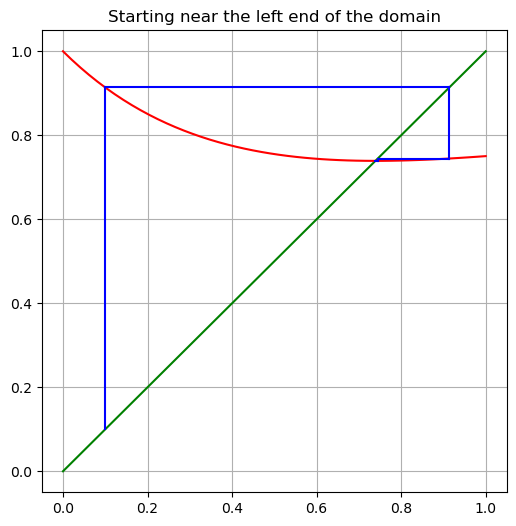

x_2 = 0.9137633861014282
x_3 = 0.7446642419816996
x_4 = 0.7390919659607759
x_5 = 0.7390851332254692


In [55]:
# Start at left
description = "Starting near the left end of the domain"
println(description)
x_k = 0.1
println("x_0 = $x_k")

figure(figsize=[6,6])
title(description)
grid(true)
plot(x, x, "g")
plot(x, g.(x), "r")
for k in 1:iterations
    g_x_k = g(x_k)
    # Graph evalation of g(x_k) from x_k:
    plot([x_k, x_k], [x_k, g(x_k)], "b")
    x_k_plus_1 = g(x_k)
    #Connect to the new x_k on the line y = x:
    plot([x_k, g(x_k)], [x_k_plus_1, x_k_plus_1], "b")
    # Update names: the old x_k+1 is the new x_k
    x_k = x_k_plus_1
    println("x_$(k+1) = $x_k")
end;

Starting near the right end of the domain
x_0 = 0.99


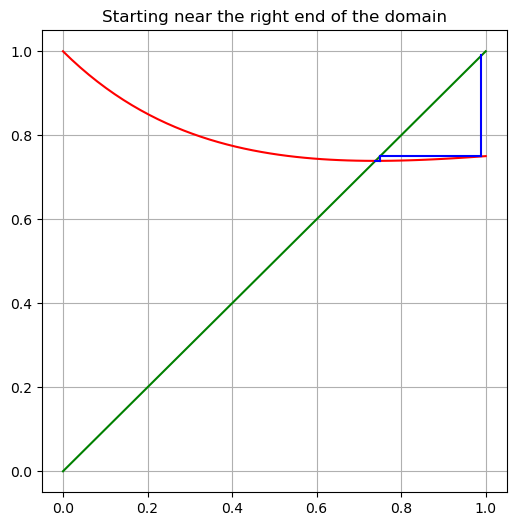

x_2 = 0.7496384013287254
x_3 = 0.7391094534708724
x_4 = 0.7390851333457581
x_5 = 0.7390851332151607


In [56]:
# Start at right
description = "Starting near the right end of the domain"
println(description)
x_k = 0.99
println("x_0 = $x_k")
figure(figsize=[6,6])
title(description)
grid(true)
plot(x, x, "g")
plot(x, g.(x), "r")
for k in 1:iterations
    g_x_k = g(x_k)
    # Graph evalation of g(x_k) from x_k:
    plot([x_k, x_k], [x_k, g(x_k)], "b")
    x_k_plus_1 = g(x_k)
    #Connect to the new x_k on the line y = x:
    plot([x_k, g(x_k)], [x_k_plus_1, x_k_plus_1], "b")
    # Update names: the old x_k+1 is the new x_k
    x_k = x_k_plus_1
    println("x_$(k+1) = $x_k")
end;

In fact, wherever you start, all iterations take you to the right of the root, and then appoache the fixed point monotonically — and very fast.
We will see an explanation for this in the section on
[The Convergence Rate of Newton"s Method](../markdown-notebooks/convergence-rate-of-newtons-method.ipynb)

### Example 2. Pushing to the limits of standard 64-bit computer arithmetic

Next demand more accuracy; this time silently.
As we will see in a later section, $10^{-16}$ is about the limit of the precision of standard computer arithmetic with 64-bit numbers.

So try to compute the root as accurately as we can within these limits:

In [36]:
x0=0.
errorTolerance=1e-16
#(root, errorEstimate, iterations) = newton(f_1, Df_1, x0, errorTolerance)
rei = newton(f_1, Df_1, x0, errorTolerance)
root = rei[1]
errorEstimate = rei[2]
iterations = rei[3]
println()
println("The root is approximately $root")
println("The estimated absolute error is $errorEstimate")
println("The backward error is $(abs(f_1(root)))")
println("This required $iterations iterations")

iteration 1
errorEstimate=1.0
iteration 2
errorEstimate=0.24963613215975608
iteration 3
errorEstimate=0.011250976928882236
iteration 4
errorEstimate=2.77575260776869e-5
iteration 5
errorEstimate=1.7012340701403256e-10
iteration 6
errorEstimate=0.0
Done!

The root is approximately 0.7390851332151607
The estimated absolute error is 0.0
The backward error is 0.0
This required 6.0 iterations


Observations:
- It only took one more iteration to meet the demand for twice as many decimal places of accuracy.
- The result is "exact" as fas as the computer arithmeric can tell, as shown by the zero backward error:
we have indeed reached the accuracy limits of computer arithmetic.

## Newton's method works with complex numbers too

We will work almost entirely with real values and vectors in $\mathbb{R}^n$, but actually,
everything above also works for complex numbers.
In particular, Newton"s method works for finding roots of functions $f:\mathbb{C} \to \mathbb{C}$;
for example when seeking all roots of a polynomial.

### Aside: notation for complex number in Julia

Python uses `im` for the square root of -1 rather than `i`.

In general, the complex number $a + b i$ is expressed as `a+bim` (note: `im` at the end, and no spaces).
As you might expect, imaginary numbers can be written without the $a$, as `bj`.

However, the coefficient `b` is always needed, even when $b=1$: the square roots of -1 are `1j` and `-1j`,
not `j` and `-j`, and the latter pair still refer to a variable `j` and its negation.

In [37]:
z = 3+4im
println(z)
println(abs(z))

3 + 4im
5.0


In [38]:
println(1im)

0 + 1im


In [39]:
println(im)

im


In [40]:
println(-1im)

0 - 1im


In [41]:
println(-im)

0 - 1im


The name `im` is reserved for this role; it cannot be used as a variable name:

In [42]:
im = 100

LoadError: cannot assign a value to variable Base.im from module Main

### Example 3. All roots of a cubic

As an example, let us seek all three cube roots of 8,
by solving $x^3 - 8 = 0$ and trying different initial values $x_0$.

In [43]:
function f_2(x)
    return x^3 - 8
end;
function Df_2(x)
    return 3*x^2
end;

#### First, $x_0 = 1$

In [44]:
x0=1.;
errorTolerance=1e-8;
rei1 = newton(f_2, Df_2, x0, errorTolerance, demoMode=true)
root1 = rei1[1]
errorEstimate1 = rei1[2]
iterations1 = rei1[3]
println()
println("The first root is approximately $root1")
println("The estimated absolute error is $errorEstimate1")
println("The backward error is $(abs(f_2(root1)))")
println("This required $iterations1 iterations")

Solving by Newton's Method.
maxIterations=100
errorTolerance=1.0e-8
iteration 1
errorEstimate=2.3333333333333335
At iteration 1 x = 3.3333333333333335 with estimated error 2.3333333333333335 backward error 29.037037037037045
iteration 2
errorEstimate=0.8711111111111113
At iteration 2 x = 2.462222222222222 with estimated error 0.8711111111111113 backward error 6.92731645541838
iteration 3
errorEstimate=0.380880974550643
At iteration 3 x = 2.081341247671579 with estimated error 0.380880974550643 backward error 1.0163315496105625
iteration 4
errorEstimate=0.07820374853029163
At iteration 4 x = 2.003137499141287 with estimated error 0.07820374853029163 backward error 0.03770908398584538
iteration 5
errorEstimate=0.003132587465783101
At iteration 5 x = 2.000004911675504 with estimated error 0.003132587465783101 backward error 5.894025079733467e-5
iteration 6
errorEstimate=4.911663441917921e-6
At iteration 6 x = 2.0000000000120624 with estimated error 4.911663441917921e-6 backward error 1.44

#### Next, start at $x_0 = i$ (a.k.a. $x_0 = im$):

In [45]:
x0=im;
rei2 = newton(f_2, Df_2, x0, errorTolerance, demoMode=true)
root2 = rei2[1]
errorEstimate2 = rei2[2]
iterations2 = rei2[3]
println()
println("The second root is approximately $root2")
println("The estimated absolute error is $errorEstimate2")
println("The backward error is $(abs(f_2(root2)))")
println("This required $iterations2 iterations")

Solving by Newton's Method.
maxIterations=100
errorTolerance=1.0e-8
iteration 1
errorEstimate=2.6874192494328497
At iteration 1 x = -2.6666666666666665 + 0.6666666666666667im with estimated error 2.6874192494328497 backward error 27.23670564570405
iteration 2
errorEstimate=1.2016193667222377
At iteration 2 x = -1.4663590926566703 + 0.6105344098423685im with estimated error 1.2016193667222377 backward error 10.211311837398133
iteration 3
errorEstimate=1.3491172750968106
At iteration 3 x = -0.23293230984230884 + 1.1571382823138845im with estimated error 1.3491172750968106 backward error 7.206656519642179
iteration 4
errorEstimate=1.7242127533456901
At iteration 4 x = -1.9202321953438537 + 1.5120026439880303im with estimated error 1.7242127533456901 backward error 13.405769067901167
iteration 5
errorEstimate=0.7480759724352086
At iteration 5 x = -1.1754417924325344 + 1.4419675366055338im with estimated error 0.7480759724352086 backward error 3.7583743808280228
iteration 6
errorEstimate=0.

This root is in fact $-1 + i \sqrt{3}$.

#### Finally, $x_0 = 1 - i$

In [46]:
x0 = 1-im;
rei3 = newton(f_2, Df_2, x0, errorTolerance, demoMode=true)
root3 = rei3[1]
errorEstimate3 = rei3[2]
iterations3 = rei3[3]
println()
println("The third root is approximately $root3")
println("The estimated absolute error is $errorEstimate3")
println("The backward error is $(abs(f_2(root3)))")
println("This required $iterations3 iterations")

Solving by Newton's Method.
maxIterations=100
errorTolerance=1.0e-8
iteration 1
errorEstimate=1.699673171197595
At iteration 1 x = 0.6666666666666667 + 0.6666666666666667im with estimated error 1.699673171197595 backward error 8.613002579999192
iteration 2
errorEstimate=3.2298759674996957
At iteration 2 x = 0.4444444444444445 - 2.5555555555555554im with estimated error 3.2298759674996957 backward error 22.506079868190287
iteration 3
errorEstimate=1.1149801035617206
At iteration 3 x = -0.07676321047922768 - 1.569896785094159im with estimated error 1.1149801035617206 backward error 8.366837899413825
iteration 4
errorEstimate=1.1289137907740707
At iteration 4 x = -1.1254435853845146 - 1.1519065719451076im with estimated error 1.1289137907740707 backward error 5.707251122724559
iteration 5
errorEstimate=0.7335292955516758
At iteration 5 x = -0.7741881838023246 - 1.795866873743186im with estimated error 0.7335292955516758 backward error 2.7414123491579243
iteration 6
errorEstimate=0.2389339

This root is in fact $-1 - i \sqrt{3}$.

## Newton's method derived via tangent line approximations: linearization

The more traditional derivation of Newton"s method is based on the very widely useful idea of *linearization*;
using the fact that a differentiable function can be approximated over a small part of its domain by a straight line — its tangent line — and it is easy to compute the root of this linear function.

So start with a first approximation $x_0$ to a solution $r$ of $f(x) = 0$.

### Step 1: Linearize at $x_0$.

The tangent line to the graph of this function wih center $x_0$,
also know as the *linearization of $f$ at $x_0$*, is

$$L_0(x) = f(x_0) + f'(x_0) (x - x_0).$$

(Note that $L_0(x_0) = f(x_0)$ and $L_0'(x_0) = f'(x_0)$.)

### Step 2: Find the zero of this linearization

Hopefully, the two functions $f$ and $L_0$ are close, so that the root of $L_0$ is close to a root of $f$;
close enough to be a better approximation of the root $r$ than $x_0$ is.

Give the name $x_1$ to this root of $L_0$:
it solves $L_0(x_1) = f(x_0) + f'(x_0) (x_1 - x_0) = 0$, so

$$x_1 = x_0 - {f(x_0)}/{f'(x_0)}$$

### Step 3: Iterate

We can then use this new value $x_1$ as the center for a new linearization
$L_1(x) = f(x_1) + f'(x_1)(x - x_1)$,
and repeat to get a hopefully even better approximate root,

$$x_2 = x_1 - f(x_1)/f'(x_1)$$

And so on: at each step, we get from approximation $x_k$ to a new one $x_{k+1}$ with

$$x_{k+1} = x_k - {f(x_k)}/{f'(x_k)}$$

And indeed this is the same formula seen above for Newton"s method.

### Illustration: a few steps of Newton's method for $x - \cos(x) = 0$.

This approach to Newton"s method via linearization and tangent lines suggests another graphical presentation;
again we use the example of $f(x) = x - \cos (x)$.
This has $Df(x) = 1 + \sin(x)$, so the linearization at center $a$ is

$$L(x) = (a - \cos(a)) + (1 + \sin(a))(x-a)$$

For Newton"s method starting at $x_0 = 0$, this gives

$$L_0(x) = -1 + x$$

and its root — the next iterate in Newton"s method — is $x_1 = 1$

Then the linearization at center $x_1$ is

$$
L_1(x) = (1 - \cos(1) + (1 + \sin(1))(x-1),
\approx 0.4596 + 1.8415(x-1)
$$
giving $x_2 \approx 1 - 0.4596/1.8415 \approx 0.7504$.

Let's graph a few steps.

In [47]:
function L_0(x)
    return -1 + x
end;

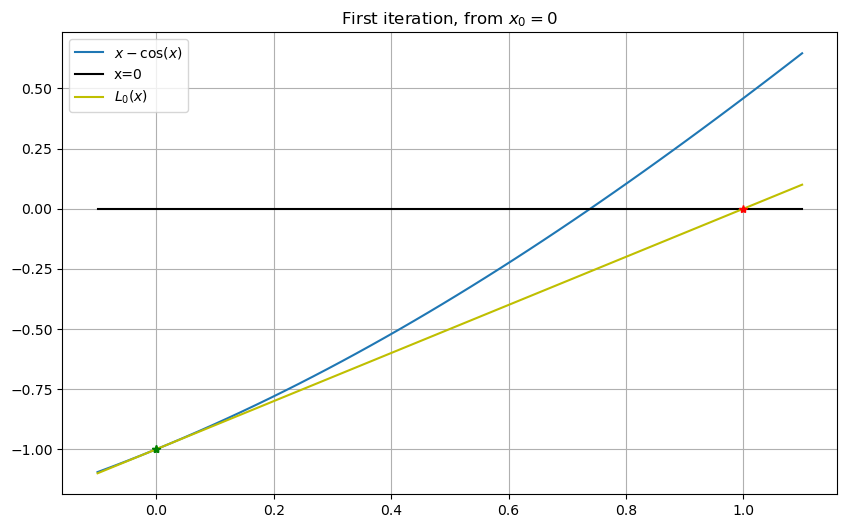

x_1=1.0


In [57]:
figure(figsize=[10,6])
title(L"First iteration, from $x_0 = 0$")
left = -0.1
right = 1.1
x = range(left, right, length=n_plot_points)
plot(x, f_1.(x), label=L"x - \cos(x)")
plot([left, right], [0, 0], "k", label="x=0")  # The x-axis, in black
x_0 = 0
plot([x_0], [f_1(x_0)], "g*")
plot(x, L_0.(x), "y", label=L"L_0(x)")
plot([x_0], [f_1(x_0)], "g*")
x_1 = x_0 - f_1(x_0)/Df_1(x_0)
println("x_1=$x_1")
plot([x_1], [0], "r*")
legend()
grid(true)

In [49]:
function L_1(x)
    return (x_1 - cos(x_1)) + (1 + sin(x_1))*(x - x_1)
end;

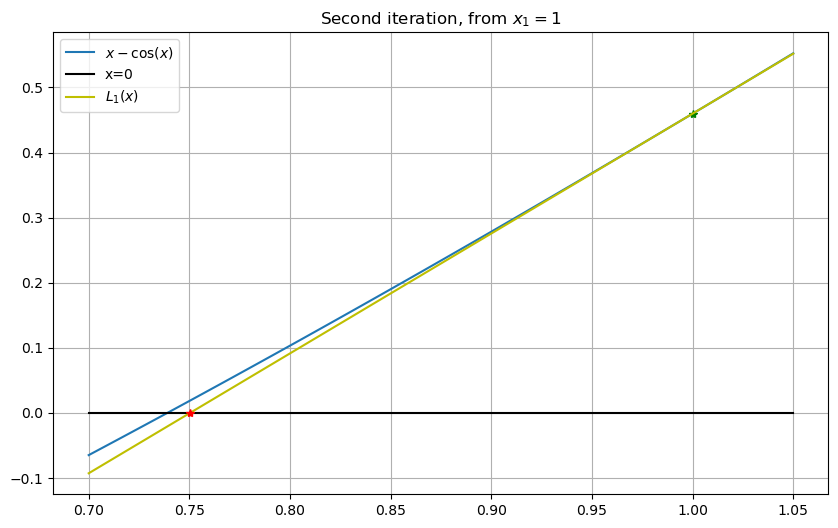

x_2=0.7503638678402439


In [59]:
figure(figsize=[10,6])
title(L"Second iteration, from $x_1 = 1$")
# Shrink the domain
left = 0.7
right = 1.05
x = range(left, right, length=n_plot_points)

plot(x, f_1.(x), label=L"x - \cos(x)")
plot([left, right], [0, 0], "k", label="x=0")  # The x-axis, in black
plot([x_1], [f_1(x_1)], "g*")
plot(x, L_1.(x), "y", label=L"L_1(x)")
x_2 = x_1 - f_1(x_1)/Df_1(x_1)
println("x_2=$x_2")
plot([x_2], [0], "r*")
legend()
grid(true)

In [51]:
function L_2(x)
    return (x_2 - cos(x_2)) + (1 + sin(x_2))*(x - x_2)
end;

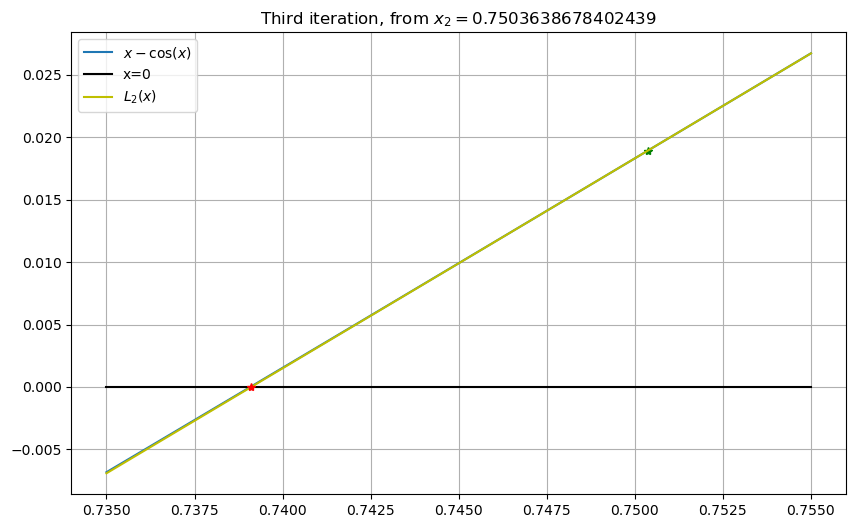

In [58]:
figure(figsize=[10,6])
title(L"Third iteration, from $x_2=$"*"$x_2")
# Shrink the domain some more
left = 0.735
right = 0.755
x = range(left, right, length=n_plot_points)
plot(x, f_1.(x), label=L"x - \cos(x)")
plot([left, right], [0, 0], "k", label="x=0")  # The x-axis, in black
plot([x_2], [f_1(x_2)], "g*")
plot(x, L_2.(x), "y", label=L"L_2(x)")
x_3 = x_2 - f_1(x_2)/Df_1(x_2)
plot([x_3], [0], "r*")
legend()
grid(true)

## How accurate and fast is this?

For the bisection method, we have seen in the section on
[Root Finding by Interval Halving](root-finding-by-interval-halving.ipynb)
a fairly simple way to get an upper limit on the absolute error in the approximations.

For absolute guarantees of accuracy, things do not go quite as well for Newton's method,
but we can at least get a very "probable" *estimate* of how large the error can be.
This requires some calculus, and more specifically Taylor's theorem,
reviewed in the section on
[Taylor"s Theorem and the Accuracy of Linearization](../markdown-notebooks/taylors-theorem.ipynb).

So we will return to the question of both the speed and accuracy of Newton's method in
[The Convergence Rate of Newton"s Method](../markdown-notebooks/convergence-rate-of-newtons-method.ipynb).

On the other hand, the example graphs above illustrate that the successive linearizations become ever more accurate as approximations of the function $f$ itself, so that the approximation $x_3$ looks "perfect" on the graph —
the speed of Newton"s method looks far better than for bisection.
This will also be explained in [The Convergence Rate of Newton"s Method](../markdown-notebooks/convergence-rate-of-newtons-method.ipynb).

---

This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)